# Análise de Dados do E-Commerce Brasileiro

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Adicionando o dataframe 'listaDeProdutos' e realizando a contagem de qual foi a categoria mais vendida por meio do método values_counts()

In [2]:
lista_De_Produtos = pd.read_csv('../Datasets/olist_products_dataset.csv')

In [3]:
print(lista_De_Produtos['product_category_name'].value_counts())

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64


#### Podemos notar que em todo o país a categoria mais vendida foi a de Cama,Mesa & Banho. Entretanto, será que ela foi a que mais gerou lucros?

In [4]:
itens_Pedido = pd.read_csv('../Datasets/olist_order_items_dataset.csv')

In [5]:
produtos_itens = pd.merge(lista_De_Produtos[['product_id', 'product_category_name']],
                          itens_Pedido[['product_id', 'price']],
                          on='product_id',
                          how='inner')

faturamento_categoria = produtos_itens.groupby('product_category_name')['price'].sum().reset_index()

faturamento_categoria = faturamento_categoria.sort_values(by='price', ascending=False).reset_index(drop=True)

print(faturamento_categoria.head())

    product_category_name       price
0            beleza_saude  1258681.34
1      relogios_presentes  1205005.68
2         cama_mesa_banho  1036988.68
3           esporte_lazer   988048.97
4  informatica_acessorios   911954.32


Por meio do código podemos identificar que a categoria que mais gerou lucros é:
1. Beleza & Saúde
2. Relógios
3. Cama, mesa & banho


### Realizando a contagem de qual foi o produto mais vendido por meio do método values_counts()

In [6]:
print(itens_Pedido['product_id'].value_counts())


product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
dbc42f8ad8afd0147a5a46be630781f8      1
5d86ed92606c80a89e547cdba3946812      1
0b8750fa58fefe42cf03a9e2e4b8fce6      1
a4758e74e2cdb74d0c4db83594ca14a3      1
350688d9dc1e75ff97be326363655e01      1
Name: count, Length: 32951, dtype: int64


Criando um filtro para mostrar os pedidos acima de R$1000,00 e com frete acima de R$75,00.

In [7]:
filtro = (itens_Pedido['price'] > 1000) & (itens_Pedido['freight_value'] > 75)
produto_Acima_De_Mil_e_Frete_75 = itens_Pedido[filtro]
produto_Acima_De_Mil_e_Frete_75

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
518,012f2c4ca09b101a73e18957c3294cd6,1,a9e9edb1bcac585bfbfa381ce40e5d99,06532f10282704ef4c69168b914b77be,2017-05-11 22:35:11,1820.00,81.62
865,02014f2495eef0e869616829d481d743,1,43cc8e4d981bc04b9d78b12e8a908d41,6061155addc1e54b4cfb51c1c2a32ad8,2018-08-24 11:05:25,1240.00,102.63
1084,028558cddca332b40b4ac4cb77407edf,1,a233df9a388d27dbdfd31731d4236db0,784ba75dd9d20200c4caed3d7a77141a,2017-07-04 10:35:09,2649.99,134.17
1122,029c545413b10a6bd7540401f6eef0a3,1,8d4e92265a16e69a1e1d76e67e46d72f,54219883e72aad869adfb2a54b7bfa0f,2018-07-17 09:30:15,1350.00,294.76
2561,05c32785b5245ab31eb5bc6b0d41f698,1,ef854c7d98d5eba672287b0a9d37075b,455c5640e8c5bd1b2ee85c0158f85727,2018-05-24 22:30:53,1990.00,125.05
...,...,...,...,...,...,...,...
110083,fa28c489b6e2a232b8d4512a06ac44f0,1,f7812bf540cb401d6419be55d3b68ce3,52f976b17ea7f2f087f56dcc419328f6,2018-07-06 09:30:19,1190.00,94.78
110309,fa9bb0fcd9ac91743999d13c2860dac5,1,f18e0f3757837733f36da5143ddccd73,17f51e7198701186712e53a39c564617,2018-02-05 17:50:44,1199.00,163.37
111245,fcbb6af360b31b05460c2c8e524588c0,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,2017-12-18 14:57:29,1050.00,144.38
111957,fe579bd413f722e51bc98182441e135c,1,4aa52adb5489aa151e17023d4e153297,f45122a9ab94eb4f3f8953578bc0c560,2017-05-17 17:10:13,1878.33,102.38


### Identificando as 5 cidades com o maior número de clientes

In [8]:
lista_De_Clientes = pd.read_csv('../Datasets/olist_customers_dataset.csv')

In [9]:
lista_De_Clientes['customer_city'].value_counts().head(5)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: count, dtype: int64

### Identificando os 5 estados com maior quantidade de clientes e os 5 estados com  menor quantidade de clientes.

In [10]:
lista_De_Clientes['customer_state'].value_counts().head(5)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: count, dtype: int64

In [11]:
lista_De_Clientes['customer_state'].value_counts().tail(5)

customer_state
RO    253
AM    148
AC     81
AP     68
RR     46
Name: count, dtype: int64

 Podemos notar que a região sudeste do país contem a maior base de clientes, enquanto isso, a região norte inclui a menor taxa de pedidos.

#### Usando o MatPlotLib para mostrar um gráfico de barras horizontais com as 5 cidades que mais venderam

Text(0.5, 0, 'N° total de compras')

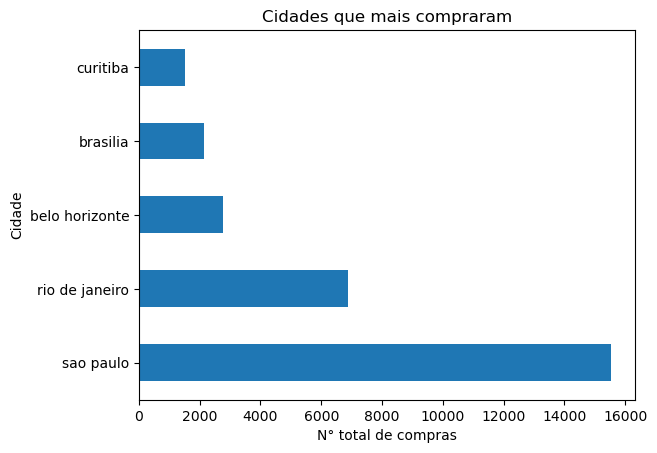

In [12]:
ranking_Cidades = lista_De_Clientes['customer_city'].value_counts()
ranking_Cidades = ranking_Cidades.reset_index()
ranking_Cidades.columns = ['Cidade', 'Número total de compras']

ranking_Cidades.head(5).plot(kind='barh', x='Cidade', y='Número total de compras', legend=False)
plt.title('Cidades que mais compraram')
plt.ylabel('Cidade')
plt.xlabel('N° total de compras')


In [13]:
ranking_Cidades.head(5)

,Cidade,Número total de compras
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


## Usando merge para unir as tabelas itensDePedido e ListadeClientes

In [14]:
pedidos = pd.read_csv('../Datasets/olist_orders_dataset.csv')
pedidos_Itens_Pedidos = pd.merge(pedidos, itens_Pedido, on='order_id', how='inner')
pedidos_Clientes = pd.merge(pedidos_Itens_Pedidos, lista_De_Clientes, on='customer_id', how='inner')
print(itens_Pedido.columns)


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


In [15]:
pedidos_Clientes[['product_id', 'price', 'customer_state']].value_counts().max()


193

In [16]:
mais_vendidos = pedidos_Clientes.groupby('product_id').agg({
    'price': 'max',  
    'customer_state': 'first',  
    'order_id': 'count' 
}).rename(columns={'order_id': 'quantidade_vendas'})


In [17]:
top5 = mais_vendidos.sort_values(by=['quantidade_vendas', 'price'], ascending=False).head(10)

In [18]:
top5

,price,customer_state,quantidade_vendas
product_id,,,
aca2eb7d00ea1a7b8ebd4e68314663af,109.90,SP,527
99a4788cb24856965c36a24e339b6058,89.90,SP,488
422879e10f46682990de24d770e7f83d,59.90,SP,484
389d119b48cf3043d311335e499d9c6b,59.90,MG,392
368c6c730842d78016ad823897a372db,59.90,SP,388
53759a2ecddad2bb87a079a1f1519f73,59.90,RJ,373
d1c427060a0f73f6b889a5c7c61f2ac4,189.99,MG,343
53b36df67ebb7c41585e8d54d6772e08,179.90,RJ,323
154e7e31ebfa092203795c972e5804a6,23.99,SP,281


### Encontrando o cliente mais fidelizado

In [19]:
quantas_Vezes_Comprou = lista_De_Clientes['customer_unique_id'].value_counts().max()
id_Mais_Recorrente = lista_De_Clientes['customer_unique_id'].value_counts().idxmax()
cliente_Recorrente = lista_De_Clientes[lista_De_Clientes['customer_unique_id'] == id_Mais_Recorrente].reset_index(drop=True)
cliente_Recorrente

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
1,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
2,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
3,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
4,42dbc1ad9d560637c9c4c1533746f86d,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
5,dfb941d6f7b02f57a44c3b7c3fefb44b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
6,65f9db9dd07a4e79b625effa4c868fcb,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
7,1c62b48fb34ee043310dcb233caabd2e,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
8,a682769c4bc10fc6ef2101337a6c83c9,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
9,6289b75219d757a56c0cce8d9e427900,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP


#### O cliente que mais fidelizado realizou um total de **17 compras**. Além disso, podemos notar que o estado em que ele mora é SP.

### Criando um ranking com os 5 clientes que mais compraram

In [20]:
ranking = lista_De_Clientes['customer_unique_id'].value_counts()
ranking_df = ranking.reset_index()
ranking_df.columns = ['ID único do cliente', 'Quantidade de compras']

In [21]:
ranking_df.head(5)

,ID único do cliente,Quantidade de compras
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,1b6c7548a2a1f9037c1fd3ddfed95f33,7
3,ca77025e7201e3b30c44b472ff346268,7
4,6469f99c1f9dfae7733b25662e7f1782,7


### Gerando um gráfico que representa o ranking de compra entre esses 5 clientes

Text(0.5, 0, 'N° de compras')

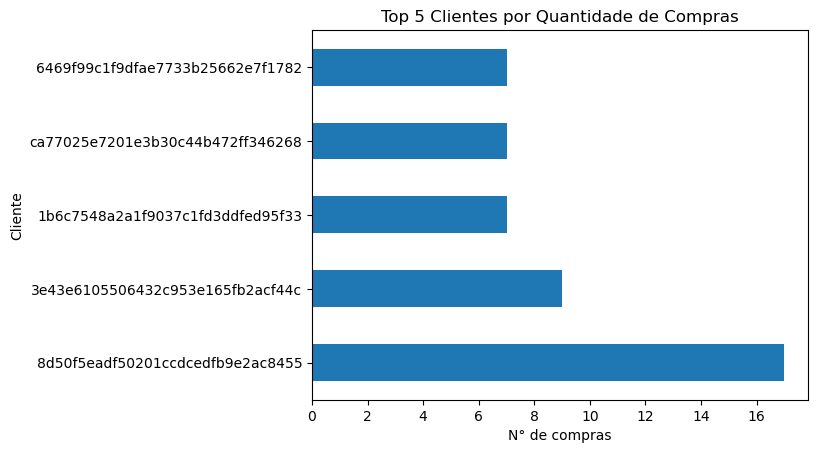

In [22]:

ranking_df.head(5).plot(kind='barh', x='ID único do cliente', y='Quantidade de compras', legend=False)
plt.title('Top 5 Clientes por Quantidade de Compras')
plt.ylabel('Cliente')
plt.xlabel('N° de compras')


### Verificando a mediana do valor do frete entre diferentes estados

1° é necessário realizar o merge entre a tabela itensDePedidos e Pedidos porque elas têm o 'order_id' que será usado para juntar com a próxima tabela

In [23]:
id_do_Pedido = pd.merge(itens_Pedido, pedidos, on='order_id', how='inner')

In [24]:
id_do_Pedido.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

Agora que criamos um dataframe que contem as informações de 'order_id' e frete, podemos dar um merge na tabela que contem as informações do estado

In [25]:
id_do_Cliente_com_Pedido = pd.merge(id_do_Pedido, lista_De_Clientes, on='customer_id', how='inner')

In [26]:
id_do_Cliente_com_Pedido.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

Agora que temos o dataframe que inclui o ID, valor do frete e estado podemos realizar o groupby para retirar a mediana entre os valores.

In [27]:
valor_Medio_de_Frete_Entre_Estados = id_do_Cliente_com_Pedido.groupby('customer_state')['freight_value'].median().reset_index()

valor_Medio_de_Frete_Entre_Estados = valor_Medio_de_Frete_Entre_Estados.sort_values(by='freight_value').reset_index(drop=True)

In [28]:
valor_Medio_de_Frete_Entre_Estados.head(3)

,customer_state,freight_value
0,SP,12.96
1,DF,17.13
2,PR,17.23


In [29]:
valor_Medio_de_Frete_Entre_Estados.tail(3)

,customer_state,freight_value
24,PI,34.295
25,RO,34.705
26,AC,35.740


Podemos notar que São Paulo contem a menor média de valor de frete em todo país, vale ressaltar que SP tem a maior base de clientes e com maior faturamento.
Entretanto, também é constatado que regiões como Rondônia e Acre tem os maiores valores de frete, isso pode ser considerado um dos motivos do baixo número de clientes nesses estados.